In [2]:
with open("openai.key", "r") as file:
    apiKey = file.read()

apiKey[:10]

'sk-proj-uO'

## Generación de imágenes mediante un prompt

In [56]:
from openai import OpenAI

client = OpenAI(api_key=apiKey)

client.base_url

URL('https://api.openai.com/v1/')

In [12]:
response = client.responses.create(
    model="gpt-5-mini",
    input="Genera una imagen que fusione a pikachú y charmander en un pokebola",
    tools=[{"type": "image_generation"}]
)

In [22]:
import base64

images = []

for index, output in enumerate(response.output):
    # print(output.type)
    if output.type == "image_generation_call":
        image_base64 = output.result
        images.append(f"pikachu_{index}.png")
        with open(f"pikachu_{index}.png", "wb") as file:
            file.write(base64.b64decode(image_base64))

images
    

['pikachu_1.png']

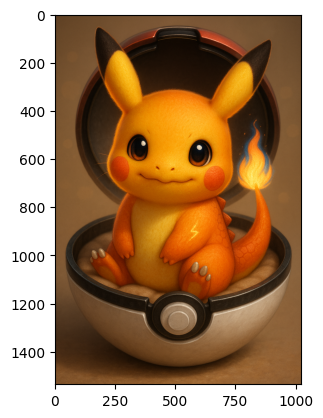

In [23]:
from PIL import Image
from matplotlib.pyplot import imshow

for image_path in images:
    image = Image.open(image_path)
    imshow(image)

## Adaptar una imagen (inpainting)

1200


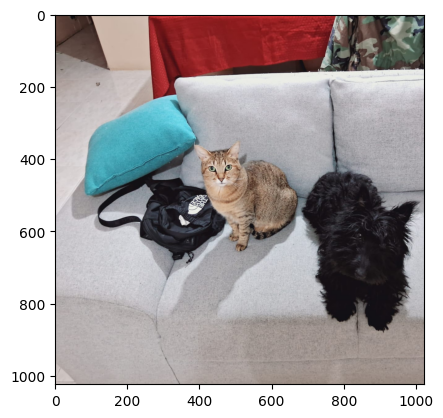

In [61]:
image = Image.open("ameli_angstrom.jpeg")

n = min(image.width, image.height)

print(n)

image = image.crop((0, 0, n, n)).resize((1024, 1024))

image.save("amelie_angstrom_1024_1024.png")

imshow(image)

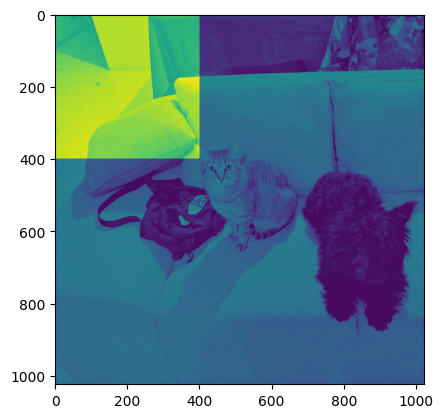

In [62]:
import numpy

mask = numpy.zeros((1024, 1024))

mask[:400, :400] = 255

imshow((mask + numpy.array(image.convert("L"))) / 2)

mask = Image.fromarray(mask).convert("RGB")

mask.save("amelie_angstrom_1024_1024_mask.png")

In [ ]:
# reponse = client.images.edit(
#     model="gpt-image-1",
#     image=open("amelie_angstrom_1024_1024.png", "wb"),
#     mask=open("amelie_angstrom_1024_1024_mask.png", "wb"),
#     prompt="Cambia el suelo sucio por alguna planta o árbol y que no se vea la esquina superior izquierda",
#     size="1024x1024"
# )

In [64]:
base64_image = base64.b64encode(open("amelie_angstrom_1024_1024.png", "rb").read()).decode("utf-8")
base64_mask = base64.b64encode(open("amelie_angstrom_1024_1024_mask.png", "rb").read()).decode("utf-8")

base64_image[:40], base64_mask[:40]

('iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADw',
 'iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADw')

In [70]:
response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {
            "role": "user",
            "content": [
                { 
                    "type": "input_text", 
                    "text": "Cambia el suelo sucio por alguna planta o árbol y que no se vea la esquina superior izquierda, la primera imagen es la original y la segunda la máscara donde deberías sustituir"
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_mask}",
                },
            ],
        }
    ],
    tools=[{"type": "image_generation"}]
)

In [71]:
print(response.output_text)

In [72]:
images = []

for index, output in enumerate(response.output):
    print(output.type)
    if output.type == "image_generation_call":
        image_base64 = output.result
        images.append(f"amelie_angstrom_inpainting_{index}.png")
        with open(f"amelie_angstrom_inpainting_{index}.png", "wb") as file:
            file.write(base64.b64decode(image_base64))

images

reasoning
image_generation_call
message


['amelie_angstrom_inpainting_1.png']

## Fusión entre dos imágenes (blend)

1024 1365


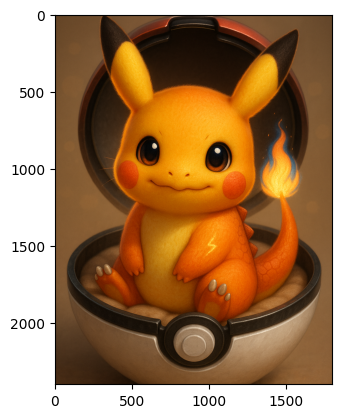

In [77]:
image = Image.open("pikachu_1.png")

n = min(image.width, image.height)
m = int(n * (2400 / 1800))

print(n, m)

image = image.crop((0, 0 + 50, n, m + 50)).resize((1800, 2400))

image.save("pikacharmander_1800_2400.png")

imshow(image)

In [78]:
base64_image1 = base64.b64encode(open("amelie_angstrom_1024_1024.png", "rb").read()).decode("utf-8")
base64_image2 = base64.b64encode(open("pikacharmander_1800_2400.png", "rb").read()).decode("utf-8")

base64_image1[:40], base64_image2[:40]

('iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADw',
 'iVBORw0KGgoAAAANSUhEUgAABwgAAAlgCAIAAAAT')

In [79]:
response = client.responses.create(
    model="gpt-5-mini",
    input=[
        {
            "role": "user",
            "content": [
                { 
                    "type": "input_text", 
                    "text": "Integra al pikachu-charmander de la segunda imagen en el sillón junto a las mascotas, si puedes quita la basura del suelo que se ve en la esquina superior izquierda"
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image1}",
                },
                {
                    "type": "input_image",
                    "image_url": f"data:image/jpeg;base64,{base64_image2}",
                },
            ],
        }
    ],
    tools=[{"type": "image_generation"}]
)

In [80]:
images = []

for index, output in enumerate(response.output):
    print(output.type)
    if output.type == "image_generation_call":
        image_base64 = output.result
        images.append(f"amelie_angstrom_pikacharmander_blend_{index}.png")
        with open(f"amelie_angstrom_pikacharmander_blend_{index}.png", "wb") as file:
            file.write(base64.b64decode(image_base64))

images

reasoning
image_generation_call
message


['amelie_angstrom_pikacharmander_blend_1.png']